Importing dependancies

In [0]:
import torch
from torch import optim
from torch import nn
import matplotlib.pyplot as plt

In [0]:
from torchvision import datasets,transforms

In [0]:
torch.manual_seed(7)
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,05.))])
trainset=datasets.MNIST('mnistTrain/',train=True,transform=transform,download=True)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

Processing...
Done!


In [0]:
torch.manual_seed(7)
testset=datasets.MNIST('mnistTest/',train=False,transform=transform,download=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

Processing...
Done!


In [0]:
image,label=next(iter(trainloader))
imageTest,labelTest=next(iter(testloader))

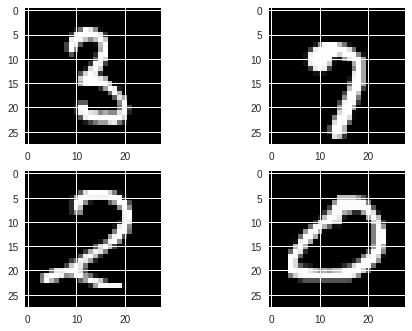

In [0]:
plt.subplot(221)
plt.imshow(image[10].view(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(image[9].view(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(image[2].view(28,28), cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(image[0].view(28,28), cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [0]:
def define_model(act1,act2):
    model=nn.Sequential(nn.Linear(784,256),
                   act1,
                   nn.Linear(256,64), 
                   act2,
                   nn.Linear(64,10),
                   nn.LogSoftmax(dim=1))
    return model

### learning rate: 0.004 

In [0]:
def train(f1,f2):
  model=define_model(f1,f2)
  criterion=nn.NLLLoss()
  epochs=10
  optimizer=optim.SGD(model.parameters(),lr=0.04)
  errorTrain=[]
  errorTest=[]
  accuracy_arr=[]
  print (str(f1)[:-2],str(f2)[:-2])

  for e in range(epochs):
      running_loss=0;
      validation_loss=0;
      accuracy=0;
      for images,labels in trainloader:
          optimizer.zero_grad()
          logits=model(images.view(images.shape[0],-1))
          loss=criterion(logits,labels)
          loss.backward()
          optimizer.step()
          running_loss+=loss
#       else:
#           print("Training Loss: {}".format(running_loss/len(trainloader)))

      for imageTest,labelTest in testloader:
          with torch.no_grad():
              logits_test=model(imageTest.view(imageTest.shape[0],-1))
          lossTest=criterion(logits_test,labelTest)
          validation_loss+=lossTest
          ps=torch.exp(logits)
          top_p,top_class=ps.topk(1,dim=1)
          equals=top_class==labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor))

      else:
          print("Epoch: {}/{}.. ".format(e+1, epochs),
                "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
                "Test Loss: {:.3f}.. ".format(validation_loss/len(testloader)),
                "Test Accuracy: {:.3f}".format((accuracy/len(testloader))*100))
#           errorTest.append(validation_loss/len(testloader))
#           errorTrain.append(running_loss/len(trainloader))
#           accuracy_arr.append((accuracy/len(testloader)*100))
          
#   plt.plot([i for i in range(epochs)],errorTrain,label='Training loss')
#   plt.plot([i for i in range(epochs)],errorTest,label='Validation loss')
#   plt.legend()
#   plt.title('Error plot when learning rate= 0.004')
#   plt.xlabel('number of epochs')
#   plt.ylabel('error')
#   plt.title(str(f1)[:-2]+"_"+str(f2)[:-2])
#   plt.savefig(str(f1)[:-2]+"_"+str(f2)[:-2]+".png")      




In [0]:
for a in [nn.ReLU(), nn.Tanh(), nn.Sigmoid(),nn.SELU()]:
    for b in [nn.ReLU(), nn.Tanh(), nn.Sigmoid(),nn.SELU()]:
            train(a, b)